# Visualizations 2

### Script contents:

#### Importing libraries and data
#### Create bar chart for busiest days of the week
#### Create histogram for busiest hours of the day
#### Create line chart for hourly expenditure
#### Create histogram for item pricing
#### Create bar chart for number of orders by department
#### Create subset of df_cop that only shows unique customers
#### Create bar chart for customer loyalty breakdown
#### Create chart for average 'days since prior order' grouped by customer loyalty
#### Create chart for number of orders grouped by customer loyalty
#### Create chart for number of orders in each department grouped by loyalty flag
#### Create chart of percentage of orders by department grouped by loyalty status
#### Create chart of percentage of orders by department grouped by customer region
#### Create chart of percentage of customer income groups grouped by customer region
#### Create chart of average item price purchased grouped by customer region
#### Create a chart of number of customers by age group
#### Create a chart of number of orders by age group
#### Create chart of number of items purchased grouped by age group
#### Create chart of percentage of number of orders by department grouped by age group
#### Create a chart for average purchased item price by age group
#### Create a chart to show number of customers with dependents by age group
#### Create a chart for count of customers according to customer profile
#### Create a chart for number of orders according to customer profile
#### Create a chart to show count of customers by age group and family status
#### Create a chart to show number of orders by age group and family status
#### Create a chart for the count of customers by gender
#### Create a chart for the number of orders by gender
#### Create a chart of loyalty status breakdown by gender
#### Create a chart of order breakdown by department and gender
#### Create a chart of department order breakdown by customer diet grouping

## Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a string of the path to main project folder

path = '/Users/jarrettpugh/Library/CloudStorage/OneDrive-Personal/Data Analytics/Career Foundry - DA Bootcamp/A4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [3]:
# Import active_customers_orders_products pickle file as dataframe df_cop (cop = customers, orders, products)

df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers_orders_products.pkl'))

In [12]:
# Import low_activity_customers_orders_products.pkl pickle file as dataframe df_excluded

df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers_orders_products.pkl'))

In [14]:
df_excluded.shape

(1440295, 32)

In [4]:
df_cop.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'department', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'customer_gender', 'customer_state',
       'customer_region', 'customer_age', 'date_joined',
       'customer_number_of_dependents', 'customer_family_status',
       'customer_income', 'customer_activity', 'age_group', 'income_group',
       'customer_dependents', 'customer_diet', 'customer_profile',
       'order_dow_name'],
      dtype='object')

In [ ]:
df_busiest_days_of_the_week.columns

In [ ]:
df_pricing = df_cop[['product_id','prices','price_range_loc']]

### Create bar chart for busiest days of the week

In [ ]:
# Create a bar chart from the 'order_dow_name' column

bar_busiest_days_of_the_week = df_busiest_days_of_the_week['order_dow_name'].value_counts().plot.barh(
title='Busiest Days of the Week',
    xlabel= 'Number of Orders',
    ylabel= 'Day of the Week'
)

### Create histogram for busiest hours of the day

In [ ]:
# Create a histogram from order_hour_of_day column

hist_busiest_hours = df_busiest_days_of_the_week['order_hour_of_day'].plot.hist(
    bins = 24,
    title ='Busiest Hours of the Day',
    ylabel = 'Number of Orders',
    xlabel = 'Hour of the Day',
    rwidth = 0.9
)

In [ ]:
df_busiest_days_of_the_week.groupby('order_hour_of_day')['order_id'].count()

### Create line chart for hourly expenditure

In [ ]:
np.random.seed(4)
dev = np.random.rand(len(df_cop)) <= 0.7

In [ ]:
# Store 70% of sample in the dataframe big

big = df_cop[dev]

# Store 30% of sample in the dataframe small

small = df_cop[~dev]

In [ ]:
# Reducing your samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day”

order_hour_prices = small[['order_hour_of_day','prices']]

In [ ]:
# Make line chart of expenditure against hour of the day

line_hourly_expenditure = sns.lineplot(
    data = order_hour_prices,
    x = 'order_hour_of_day',
    y = 'prices')

In [ ]:
# Find the average price of items purchased grouped by order hour of day

order_hour_prices.groupby('order_hour_of_day')['prices'].mean()

### Create histogram for item pricing

In [ ]:
# Imputing price outliers as missing values 'Nan's

df_pricing.loc[df_pricing['prices'] >100, 'prices'] = np.nan

In [ ]:
df_pricing['prices'].max()

In [ ]:
pricing_hist = df_pricing['prices'].plot.hist(
    bins = 70,
    title = 'Item Pricing Frequency',
    ylabel = 'Number of Items',
    xlabel = 'Price of Item ($)',
    rwidth = 0.75
)

In [ ]:
df_cop.columns

In [ ]:
df_pricing_group = df_cop[['product_id', 'price_range_loc']]

In [ ]:
df_pricing.groupby('price_range_loc')['product_id'].count()

In [ ]:
df_pricing.groupby('price_range_loc')['product_id'].count().plot.barh(
    title='Item Price Range',
    xlabel= 'Number of Items',
    ylabel= 'Price Range'
)

### Create bar chart for number of orders by department

In [ ]:
df_cop['department'].shape

In [ ]:
# Create data for count of orders by department

df_cop['department'].value_counts(dropna=False).sort_values(ascending=False)

In [ ]:
# Create horizontal bar chart of count of departments by department. Sort in ascending order.

df_cop['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(
    title='Number of Purchases by Department',
    xlabel= 'Number of Orders',
    ylabel= 'Department'
)

### Create subset of df_cop that only shows unique customers

In [5]:
df_cop.shape

(30964564, 39)

In [6]:
df_customers = df_cop.drop_duplicates(subset=['user_id'])

In [7]:
df_customers.shape

(162631, 39)

### Create bar chart for customer loyalty breakdown

In [9]:
# Create data table for the count of customers by customer loyalty breakdown

df_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    76864
New customer        68750
Loyal customer      17017
Name: count, dtype: int64

In [ ]:
# Create bar chart for count of customers by customer loyalty breakdown

df_customers['loyalty_flag'].value_counts().plot.bar(
    title='Customer Loyalty Breakdown',
    xlabel= 'Loyalty Flag',
    ylabel= 'Number of Customers'
)

In [13]:
# Look at customer loyalty from exclusion flag

df_excluded_customers = df_excluded.drop_duplicates(subset=['user_id'])

In [15]:
# Look at shape

df_excluded_customers.shape

(43578, 32)

In [16]:
# Create data table for the count of excluded customers by customer loyalty breakdown

df_excluded_customers['loyalty_flag'].value_counts()

loyalty_flag
New customer    43578
Name: count, dtype: int64

There is a underrepresentation of new customers in the Customer Loyalty Breakdown chart above due to customers with less than 5 orders being excluded from the data.

### Create chart for average 'days since prior order' grouped by customer loyalty

In [21]:
# Determine the average number of days since prior order for each customer loyalty grouping

mean_median = df_cop.groupby('loyalty_flag')['days_since_prior_order'].agg(['mean', 'median'])

In [22]:
sorted_mean = mean_median.sort_values(by='mean', ascending=False)

In [ ]:
sorted_mean

In [ ]:
sorted_mean.plot.bar(
    title='Days Between Orders by Customer Loyalty',
    xlabel= 'Loyalty Flag',
    ylabel= 'Number of Days Since Last Order'
)

### Create chart for number of orders grouped by customer loyalty

In [30]:
# Create data for number of orders grouped by customer loyalty

df_cop['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

In [ ]:
# Create chart for number of orders grouped by customer loyalty

df_cop['loyalty_flag'].value_counts(dropna=False).plot.bar(
    title='Customer Loyalty Orders',
    xlabel= 'Loyalty Flag',
    ylabel= 'Number of Orders'
)

### Create chart for number of orders in each department grouped by loyalty flag

In [37]:
# Create crosstab for number of orders by loyalty flag

loyalty_cross = pd.crosstab(df_cop['department'], df_cop['loyalty_flag'], dropna=False)

In [42]:
loyalty_cross['total'] = loyalty_cross.sum(axis=1)

In [ ]:
loyalty_cross

In [82]:
# Sort crosstab

loyalty_cross_sorted = loyalty_cross.sort_values(by='total', ascending=False)

In [83]:
# Omit total column so it doesn't show up in chart

loyalty_cross_sorted = loyalty_cross_sorted[['Loyal customer', 'New customer', 'Regular customer']]

In [ ]:
loyalty_cross_sorted

In [ ]:
loyalty_cross_sorted.plot.barh(
    stacked=True,
    title= 'Order Habits by Customer Loyalty Status',
    xlabel= 'Number of Orders',
    ylabel= 'Department'
)

### Create chart of percentage of orders by department grouped by loyalty status

In [67]:
# Create crosstab of percentage of orders by department grouped by loyalty status

cross_normalize = pd.crosstab(df_cop['department'], df_cop['loyalty_flag'], normalize='columns')

In [68]:
cross_percentage = cross_normalize*100

In [ ]:
cross_percentage

In [79]:
# Sort crosstab

cross_percentage_sorted = cross_percentage.sort_values(by='Regular customer', ascending=True)

In [ ]:
cross_percentage_sorted

In [ ]:
# Plot cross_percentage_sorted

cross_percentage_sorted.plot.barh(
    stacked=True,
    title= 'Department Order Percentage by Customer Loyalty Status',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

### Create chart of percentage of orders by department grouped by customer region

In [86]:
# Create crosstab of percentage of orders by department grouped by customer region

cross_region = pd.crosstab(df_cop['department'], df_cop['customer_region'], normalize='columns')

In [88]:
# Make it percentage by multiplying by 100

cross_region = cross_region*100

In [ ]:
cross_region['total'] = cross_region.sum(axis=1)

cross_region

In [105]:
# Sort crosstab

cross_region_sorted = cross_region.sort_values(by='total', ascending=False)

In [93]:
cross_region_sorted.columns

Index(['Midwest', 'Northeast', 'South', 'West', 'total'], dtype='object', name='customer_region')

In [106]:
# Omit total column so it doesn't show up in chart

cross_region_sorted = cross_region_sorted[['Midwest', 'Northeast', 'South', 'West']]

In [107]:
#Create crosstab datatable sorted

cross_region_sorted

customer_region,Midwest,Northeast,South,West
department,,,,
produce,29.389399,29.150884,29.361218,29.325236
dairy eggs,16.697484,16.736848,16.710239,16.740532
snacks,8.884416,9.024381,8.891161,8.973239
beverages,8.248680,8.471284,8.334860,8.206829
frozen,6.861173,6.778726,6.884846,6.851879
pantry,5.788518,5.722764,5.738978,5.776118
bakery,3.604662,3.647054,3.604064,3.635004
canned goods,3.270104,3.237808,3.272752,3.282623
deli,3.228859,3.264561,3.235530,3.246432


<Axes: title={'center': 'Department Order Percentage by Customer Region'}, xlabel='Percentage of Orders (%)', ylabel='Department'>

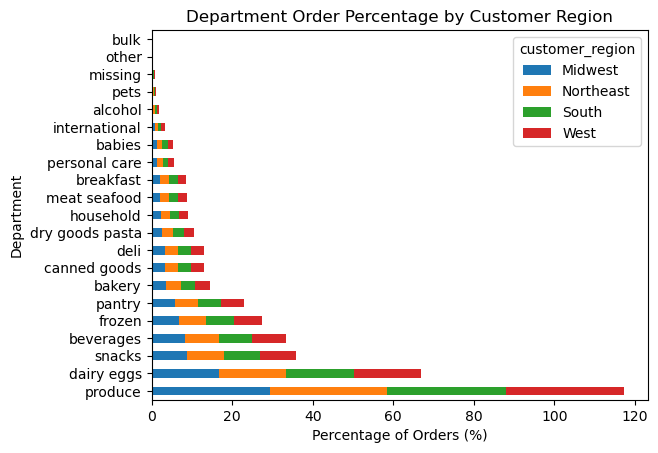

In [109]:
# Plot cross_region_sorted

cross_region_sorted.plot.barh(
    stacked= True,
    title= 'Department Order Percentage by Customer Region',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

### Create chart of percentage of customer income groups grouped by customer region

In [124]:
# Create crosstab of percentage of orders by department grouped by customer region

cross_income = pd.crosstab(df_customers['customer_region'], df_customers['income_group'], normalize='index')

In [125]:
cross_income*100

income_group,high,low,moderate
customer_region,,,
Midwest,23.691891,29.416823,46.891286
Northeast,23.662573,29.582590,46.754837
South,23.159818,29.653276,47.186906
West,23.396254,30.030616,46.573130


<Axes: title={'center': 'Customer Income Groups by Region'}, xlabel='Customer Region', ylabel='Percentage of Customers'>

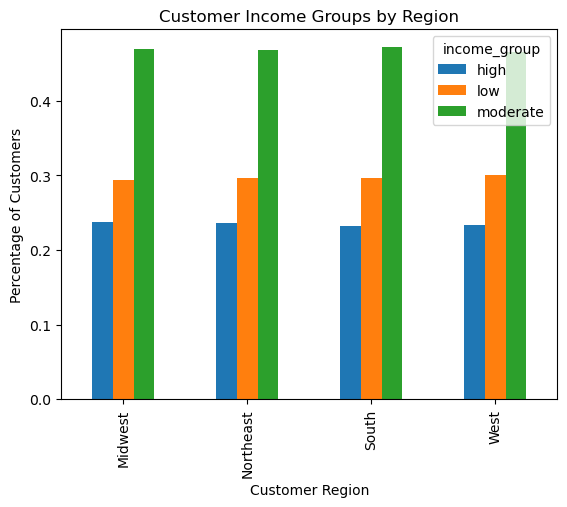

In [126]:
cross_income.plot.bar(
    title= 'Customer Income Groups by Region',
    xlabel= 'Customer Region',
    ylabel= 'Percentage of Customers')

### Create chart of average item price purchased grouped by customer region

In [135]:
price_region = df_customers.groupby('customer_region')['prices'].mean()
price_region = price_region.round(2)
price_region = price_region.sort_values(ascending=False)
price_region

customer_region
West         8.93
Northeast    8.34
Midwest      7.86
South        7.82
Name: prices, dtype: float64

<Axes: title={'center': 'Average Purchased Item Price by Region'}, xlabel='Customer Region', ylabel='Average Purchased Item Price ($)'>

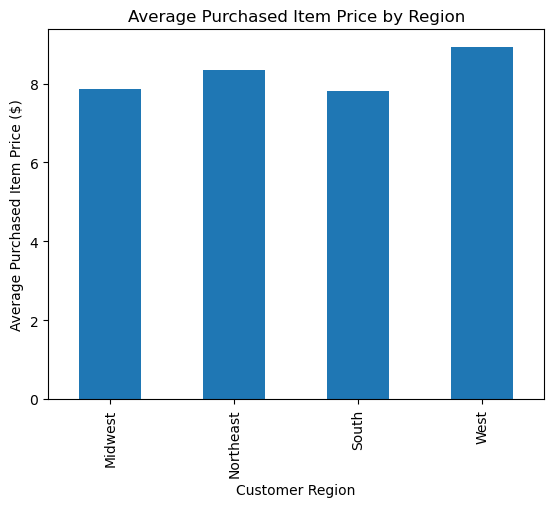

In [132]:
price_region.plot.bar(
    title= 'Average Purchased Item Price by Region',
    xlabel= 'Customer Region',
    ylabel= 'Average Purchased Item Price ($)'
)

### Create a chart of number of customers by age group

In [204]:
# Number of customers by age group

df_customers['age_group'].value_counts(dropna=False)

age_group
66-81    40769
34-49    40716
18-33    40641
50-65    40505
Name: count, dtype: int64

<Axes: xlabel='age_group'>

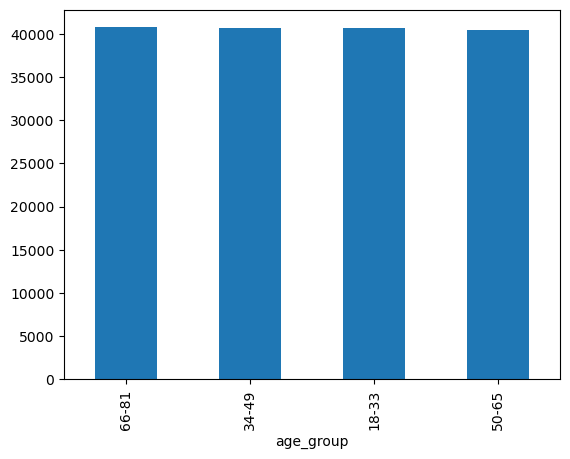

In [205]:
df_customers['age_group'].value_counts(dropna=False).plot.bar()

### Create a chart of number of orders by age group

In [206]:
df_cop['age_group'].value_counts(dropna=False)

age_group
34-49    7790824
18-33    7757465
66-81    7730834
50-65    7685441
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders by Age Group'}, xlabel='Age Group', ylabel='Number of Orders'>

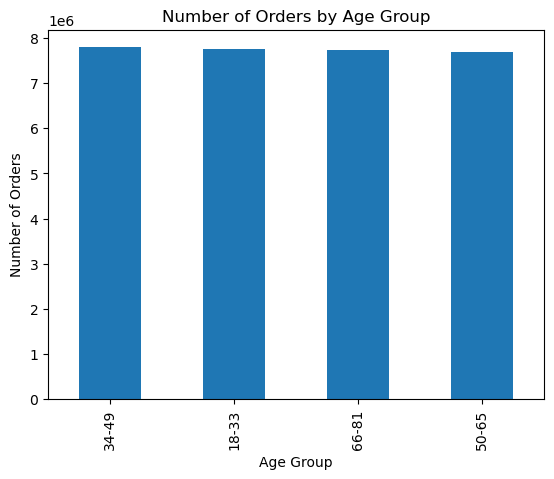

In [208]:
df_cop['age_group'].value_counts(dropna=False).plot.bar(
    title= 'Number of Orders by Age Group',
    xlabel= 'Age Group',
    ylabel= 'Number of Orders'
)

### Create chart of number of items purchased grouped by age group

In [138]:
df_cop['age_group'].value_counts(dropna=False)

age_group
34-49    7790824
18-33    7757465
66-81    7730834
50-65    7685441
Name: count, dtype: int64

In [141]:
# Create crosstab of percentage of orders by department grouped by age group

cross_age = pd.crosstab(df_cop['department'], df_cop['age_group'], normalize='columns')
cross_age = cross_age*100

In [200]:
cross_age_sorted = cross_age.sort_values(by='18-33', ascending=False)
cross_age_sorted

age_group,18-33,34-49,50-65,66-81
department,,,,
produce,29.249207,29.415746,29.269134,29.351102
dairy eggs,16.835203,16.779406,16.562537,16.699867
snacks,8.973331,8.894066,8.963806,8.905559
beverages,8.211716,8.263837,8.387873,8.361504
frozen,6.810911,6.819343,6.890483,6.888390
pantry,5.753890,5.741164,5.775739,5.758421
bakery,3.626262,3.610748,3.640090,3.601914
canned goods,3.287827,3.253507,3.273813,3.258898
deli,3.236959,3.249181,3.241545,3.239793


<Axes: title={'center': 'Department Order Percentage by Age Group'}, xlabel='Percentage of Orders (%)', ylabel='Department'>

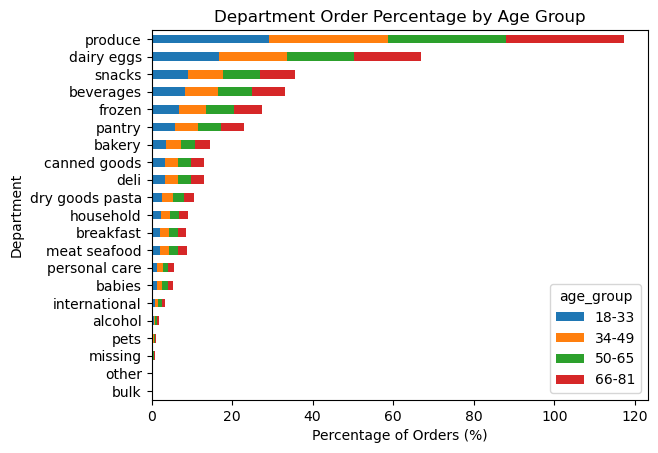

In [199]:
# Create a chart from the crosstab

cross_age_sorted.plot.barh(
    stacked= True,
    title= 'Department Order Percentage by Age Group',
    xlabel= 'Percentage of Orders (%)',
    ylabel= 'Department'
)

### Create chart of percentage of number of orders by department grouped by age group

In [161]:
# Create data table of number of orders by department grouped by customer age group

age_income = df_customers.groupby('age_group')['customer_income'].mean()
age_income = age_income.sort_values(ascending=False)
age_income

age_group
66-81    111072.926194
50-65    110869.673522
34-49     92653.181796
18-33     68158.200143
Name: customer_income, dtype: float64

<Axes: title={'center': 'Customer Income by Age Group'}, xlabel='Customer Age Group', ylabel='Customer Income ($)'>

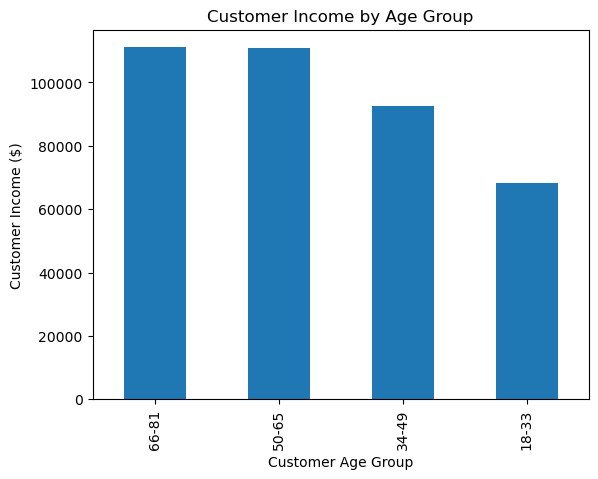

In [202]:
age_income.plot.bar(
    title= 'Customer Income by Age Group',
    xlabel= 'Customer Age Group',
    ylabel= 'Customer Income ($)'
)

### Create a chart for average purchased item price by age group

In [201]:
age_price = df_customers.groupby('age_group')['prices'].mean()
age_price = age_price.sort_values(ascending=False)
age_price = age_price.round(2)
age_price

age_group
66-81    8.94
18-33    8.22
50-65    7.85
34-49    7.81
Name: prices, dtype: float64

<Axes: title={'center': 'Average Purchased Item Price by Age Group'}, xlabel='Customer Age Group', ylabel='Average Purchased Item Price'>

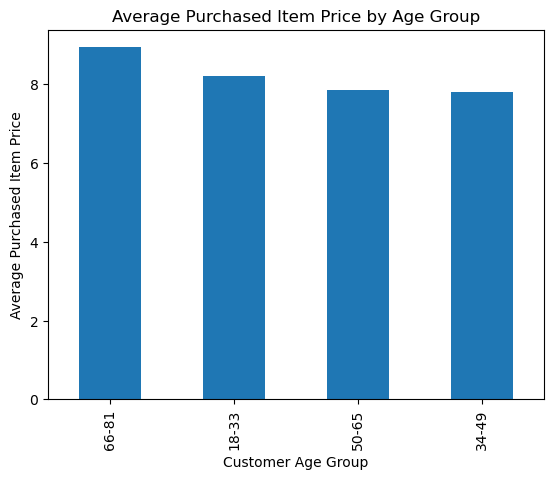

In [171]:
age_price.plot.bar(
    title= 'Average Purchased Item Price by Age Group',
    xlabel= 'Customer Age Group',
    ylabel= 'Average Purchased Item Price'
)

### Create a chart to show number of customers with dependents by age group

In [172]:
# Create datatable

age_dependents = pd.crosstab(df_customers['age_group'], df_customers['customer_dependents'])
age_dependents

customer_dependents,1 or more dependents,no dependents
age_group,,
18-33,30371,10270
34-49,30421,10295
50-65,30408,10097
66-81,30704,10065


<Axes: title={'center': 'Dependency Status of Customers by Age Group'}, xlabel='Age Group', ylabel='Number of Customers'>

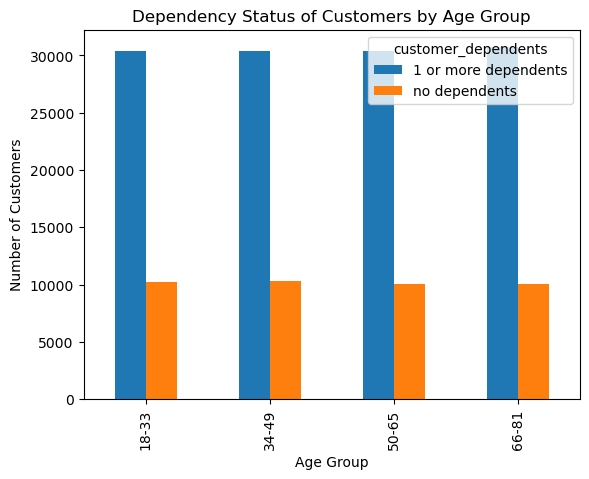

In [230]:
# Create chart

age_dependents.plot.bar(
    title= 'Dependency Status of Customers by Age Group',
    xlabel= 'Age Group',
    ylabel= 'Number of Customers'
)

### Create a chart for count of customers according to customer profile

In [195]:
# Create a datable for count of customers according to customer profile

customer_profiles = df_customers['customer_profile'].value_counts(dropna=False)
customer_profiles = customer_profiles.sort_values(ascending=False)
customer_profiles

customer_profile
middle-aged male with 1 or more dependents      30617
middle-aged female with 1 or more dependents    30212
old male with 1 or more dependents              15526
young male with 1 or more dependents            15329
old female with 1 or more dependents            15178
young female with 1 or more dependents          15042
middle-aged male with no dependents             10247
middle-aged female with no dependents           10145
young male with no dependents                    5228
old male with no dependents                      5051
young female with no dependents                  5042
old female with no dependents                    5014
Name: count, dtype: int64

<Axes: title={'center': 'Count of Customer Profiles'}, xlabel='Number of Customers', ylabel='Customer Profile'>

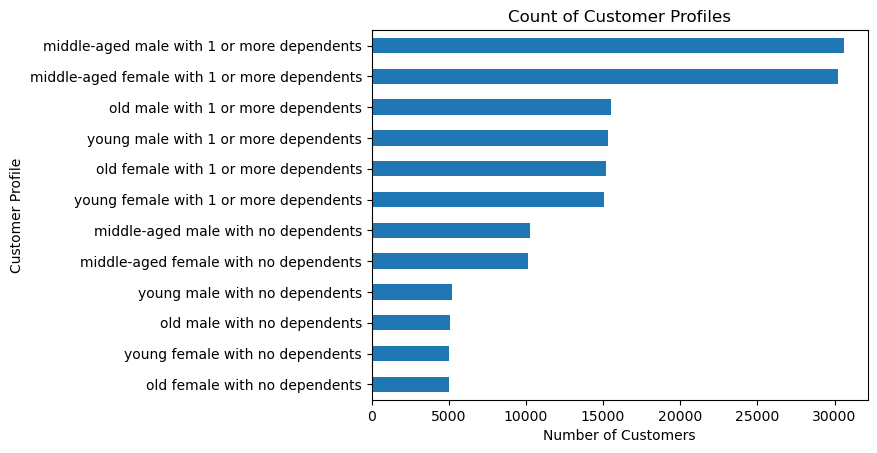

In [194]:
# Create a chart for count of customers according to customer profile

customer_profiles.plot.barh(
    title= 'Count of Customer Profiles',
    xlabel= 'Number of Customers',
    ylabel= 'Customer Profile'
)

### Create a chart for number of orders according to customer profile

In [228]:
# Create a datable for number of orders according to customer profile

profile_orders = df_cop.groupby('customer_profile')['age_group'].count()
profile_orders = profile_orders.sort_values(ascending=False)
profile_orders

customer_profile
middle-aged male with 1 or more dependents      5817076
middle-aged female with 1 or more dependents    5764928
young male with 1 or more dependents            2956564
old male with 1 or more dependents              2931702
old female with 1 or more dependents            2893411
young female with 1 or more dependents          2861202
middle-aged male with no dependents             1953048
middle-aged female with no dependents           1941213
young male with no dependents                    986662
old female with no dependents                    964033
young female with no dependents                  953037
old male with no dependents                      941688
Name: age_group, dtype: int64

<Axes: title={'center': 'Number of Orders by Customer Profile'}, xlabel='Number of Orders', ylabel='Customer Profile'>

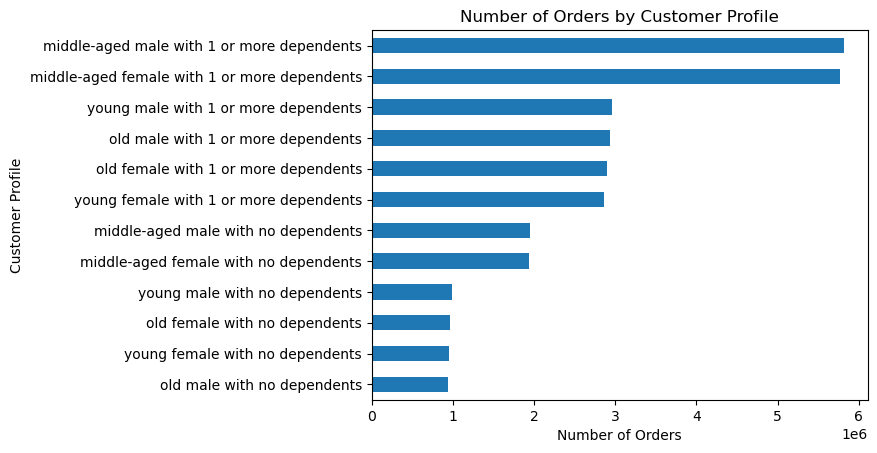

In [196]:
# Create a chart for number of orders according to customer profile

profile_orders.plot.barh(
    title= 'Number of Orders by Customer Profile',
    xlabel= 'Number of Orders',
    ylabel= 'Customer Profile'
)

### Create a chart to show count of customers by age group and family status

In [159]:
# Create crosstab between age group and family status

cross_age_family = pd.crosstab(df_customers['age_group'], df_customers['customer_family_status'])
cross_age_family

customer_family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
18-33,0,7608,22763,10270
34-49,0,0,30421,10295
50-65,3766,0,30408,6331
66-81,10065,0,30704,0


<Axes: ylabel='age_group'>

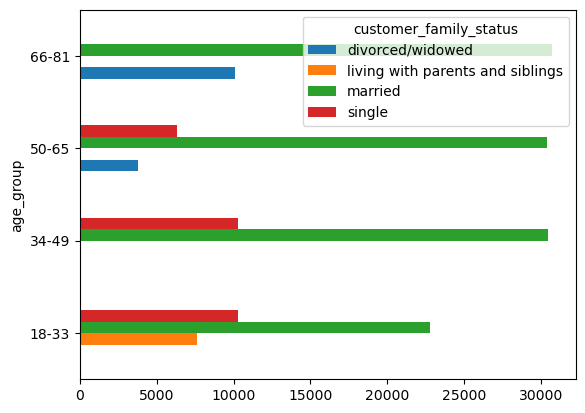

In [160]:
cross_age_family.plot.barh()

### Create a chart to show number of orders by age group and family status

In [162]:
age_family = df_cop.groupby('age_group')['age_group'].count()
age_family

age_group
18-33    7757465
34-49    7790824
50-65    7685441
66-81    7730834
Name: age_group, dtype: int64

### Create a chart for the count of customers by gender

In [209]:
# Create a datable for count of customers according to gender

customers_genders = df_customers['customer_gender'].value_counts(dropna=False)
customers_genders

customer_gender
Male      81998
Female    80633
Name: count, dtype: int64

<Axes: title={'center': 'Number of Customers by Gender'}, xlabel='Gender', ylabel='Number of Customers'>

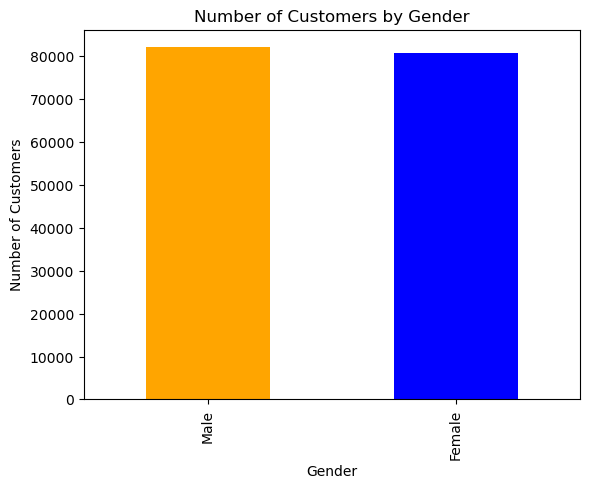

In [229]:
# Create a chart for count of customers according to gender

customers_genders.plot.bar(
    color= ['orange', 'blue'],
    title= 'Number of Customers by Gender',
    xlabel= 'Gender',
    ylabel= 'Number of Customers'
)

### Create a chart for the number of orders by gender

In [212]:
# Create a datable for number of orders according to gender

orders_genders = df_cop['customer_gender'].value_counts(dropna=False)
orders_genders

customer_gender
Male      15586740
Female    15377824
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders by Gender'}, xlabel='Gender', ylabel='Number of Orders'>

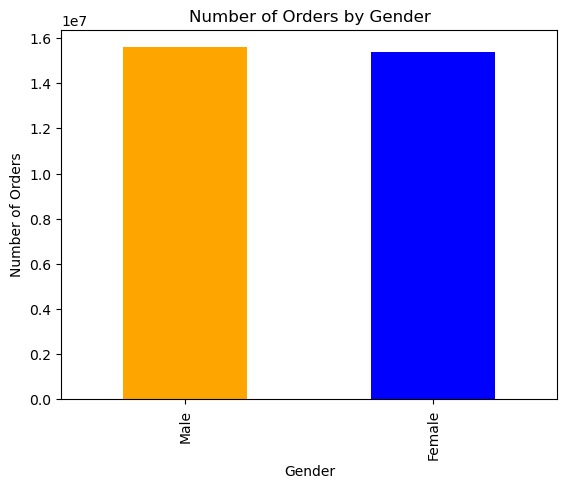

In [225]:
# Create a chart for number of orders according to gender

orders_genders.plot.bar(
    color= ['orange', 'blue'],
    title= 'Number of Orders by Gender',
    xlabel= 'Gender',
    ylabel= 'Number of Orders'
)

### Create a chart of loyalty status breakdown by gender

In [217]:
# Create crosstab between loyalty status and gender

cross_gender_loyalty = pd.crosstab(df_customers['loyalty_flag'], df_customers['customer_gender'])
cross_gender_loyalty

customer_gender,Female,Male
loyalty_flag,,
Loyal customer,8338,8679
New customer,34071,34679
Regular customer,38224,38640


<Axes: xlabel='loyalty_flag'>

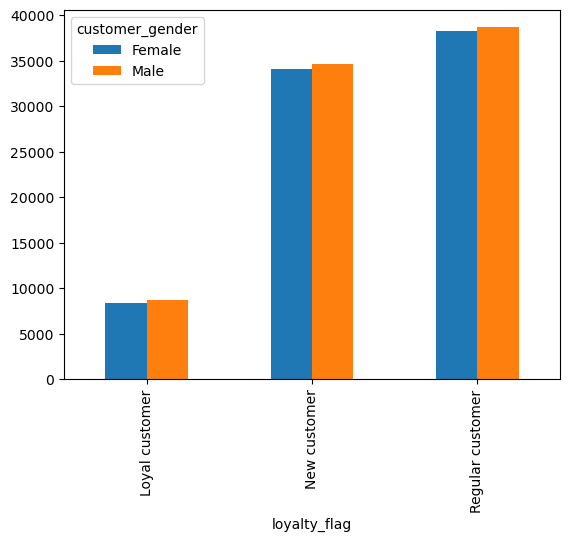

In [218]:
cross_gender_loyalty.plot.bar()

### Create a chart of order breakdown by department and gender

In [224]:
# Create crosstab of percentage of orders by department grouped by gender

cross_department_gender = pd.crosstab(df_cop['department'], df_cop['customer_gender'], normalize='columns')
cross_department_gender = cross_department_gender*100
cross_department_gender = cross_department_gender.sort_values(by='Male', ascending=False)
cross_department_gender

customer_gender,Female,Male
department,,
produce,29.271209,29.371106
dairy eggs,16.742687,16.697019
snacks,8.960019,8.908534
beverages,8.326172,8.285998
frozen,6.844135,6.860010
pantry,5.749246,5.765131
bakery,3.636035,3.603608
canned goods,3.241688,3.294935
deli,3.246513,3.237309


<Axes: title={'center': 'Department Order Percentage by Gender'}, xlabel='Percentage of Items Ordered (%)', ylabel='Department'>

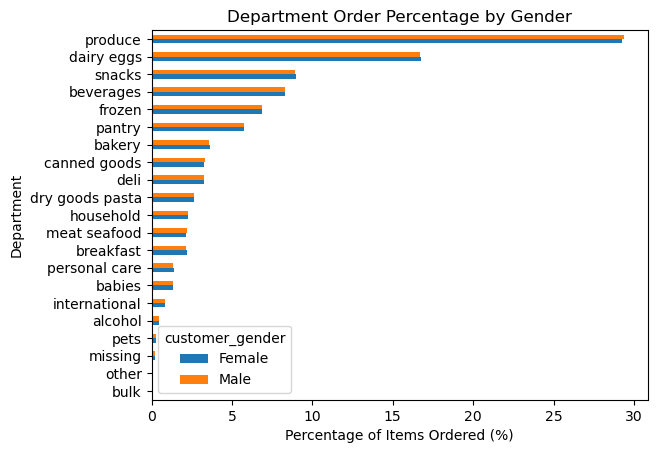

In [223]:
cross_department_gender.plot.barh(
    title= 'Department Order Percentage by Gender',
    xlabel= 'Percentage of Items Ordered (%)',
    ylabel= 'Department'
)

### Create a chart of department order breakdown by customer diet grouping

In [233]:
# Create crosstab of percentage of orders by department grouped by customer diet

cross_department_diet = pd.crosstab(df_cop['department'], df_cop['customer_diet'], normalize='columns')
cross_department_diet = cross_department_diet.sort_values(by='none', ascending=False)
cross_department_diet = cross_department_diet*100
cross_department_diet

customer_diet,none,vegan,vegetarian
department,,,
produce,30.165349,31.292017,26.676348
dairy eggs,16.651683,0.000000,17.609361
snacks,7.967750,17.236674,11.531925
beverages,7.191121,19.781223,11.225425
frozen,6.984985,5.533942,6.502183
pantry,5.923444,4.267797,5.312959
bakery,3.755290,1.656473,3.287854
canned goods,3.533827,1.528407,2.533154
deli,3.288724,1.680989,3.163270
